Loss: 389.8003687597888 
memoryUse(bytes): 107.974656 
Time(seconds): 0.20438289642333984


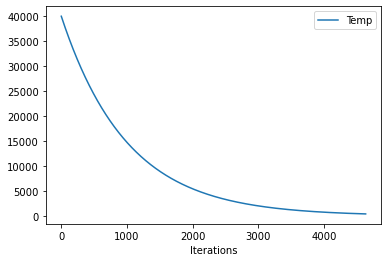

In [9]:
import os
import math
import sys
import psutil
import random
from random import choice
import time
import pandas as pd
from collections import Counter

temperatureVariation = []
neighboursVariation = []
globalList = []

process = psutil.Process(os.getpid())

def initial(N):
    global globalList
    nlist = list(random.randrange(N) for i in range(N))
    globalList = nlist
    return nlist

#####################################################################
           
def goalTest(state):
    ct1, ct2, ct3 = (set() for i in range(3))
    for row, col in enumerate(state):
        if col in ct1 or row - col in ct2 or row + col in ct3:
            return False
        ct1.add(col)
        ct2.add(row - col)
        ct3.add(row + col)
    return True

#####################################################################

def heuristic(state):
    '''Goes through the counter incrementing the value of collisions
       If theres any (ct1/ct2/ct3)>1 do cnt[key]-1 and finally Define to remove double cts
    '''
    ct1, ct2, ct3 = [Counter() for i in range(3)]
    for row, col in enumerate(state):
        ct1[col] += 1
        ct2[row - col] += 1
        ct3[row + col] += 1
    collisions = 0  

    for cnt in [ct1, ct2, ct3]:
        for key in cnt:
            collisions += cnt[key] * (cnt[key] - 1) / 2
    return -collisions

#####################################################################

# Returns all available states based on the currentState move per column
def nearStates(state):
    nearStates = []
    #Check if the neighbor column is empty
    for row in range(N):
        for col in range(N):
            if col != state[row]: #if != then move is okay 
                aux = list(state) #queens location
                aux[row] = col  # change to empty column
                nearStates.append(list(aux))  # append
    return nearStates

#####################################################################

#Return randomChoice for nearStates
def randomNearState(state):
    return choice(nearStates(state))

#####################################################################


def temperatureChange(curveLenght=40000, reduxPer=0.001, iter=99999): # for each ++ redux curvelenght temperature percent 
    return lambda afterTemperature: (curveLenght * math.exp(-reduxPer * afterTemperature)if afterTemperature<iter else 0)

#####################################################################

def simulatedAnnealing(state, tChange=temperatureChange()):
    
    current = state 
    currentGoal = heuristic(current) 
    
    for i in range(sys.maxsize): 
        # For each ++ redux curveLenght temperature
        afterTemperature = tChange(i)
        #print(afterTemperature)
        
        global temperatureVariation
        
        temperatureVariation.append(afterTemperature)
        
        if temperatureVariation == 0 or goalTest(current):
            return current
        
        neighbour = randomNearState(current)
        global neighboursVariation
        neighboursVariation.append(neighbour)
        
        #print(neighbour)
        if not neighbour:
            return current

        newGoal = heuristic(neighbour)
        energyVariation = newGoal - currentGoal
        
        # Decision made based on energyVar and the chances probability
        if energyVariation > 0 or math.exp(energyVariation / afterTemperature) > random.uniform(0.0, 1.0):
            current = neighbour
            currentGoal = newGoal

#####################################################################

#Define Queens initial
N = 8
state = initial(N)

axes = [i for i in range(N)]
initialState  = pd.DataFrame(index=(axes),columns=(axes))
finalState = pd.DataFrame(index=(axes),columns=(axes))

for i in range(len(globalList)):
    initialState[i][globalList[i]] = 'Queen'
    
#####################################################################  
  
#Calling simulated and calculating execution time      
initial = time.time()
simulated = simulatedAnnealing(state)
end = time.time()
totalTime = end-initial 

#Final board dataframe popul
for i in range(len(simulated)):
    finalState[i][simulated[i]] = "Queen"
    
# plot of algorithm function
index = [i for i in temperatureVariation]    
columns = [j for j in range(len(temperatureVariation))]
 
 
dataDict = {'Temp': index,
        'Iterations': columns}

dataPlot = pd.DataFrame(dataDict,columns=['Temp','Iterations'])
#print(dframe)

dataPlot.plot(x='Iterations',y='Temp',kind='line')

memoryUse = (process.memory_info()[0])/1000000

print(
    "Loss:",temperatureVariation[len(temperatureVariation)-1],
    '\nmemoryUse(bytes):',memoryUse, 
    "\nTime(seconds):",totalTime )  
